In [1]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import *
from scipy.constants import e, h, hbar
from qutip import *

In [3]:
font = {"size":20}
matplotlib.rc("font", **font)

In [4]:
C_q = 90e-15
Φ = 0 # in Φ_0

def E_C():
    return (e)**2/2/C_q/h/1e9
def E_J():
    return (6+E_C())**2/8/E_C()*cos(pi*Φ)

In [5]:
E_J()/E_C()

104.24114800731283

In [6]:
N_q = 7

In [7]:
def n():
    return Qobj((diag(arange(-N_q, N_q+1, 1))))
def H_q():
    return 4*E_C()*n()**2+ E_J()/2*(Qobj(diag(ones(2*N_q), 1) + diag(ones(2*N_q), -1)))

In [8]:
evals, evecs = H_q().eigenstates()

In [9]:
evals[2]-evals[1] - evals[1]+evals[0], evals[1]-evals[0], evals[2]-evals[0]

(-0.23497686116099459, 5.9918038157876481, 11.748630770414302)

In [12]:
Ts = linspace(0, 100, 1000)
f_q = 0.5

states = mesolve([H_q(), [n(), f_q*sin((evals[1]-evals[0])*Ts)]], evecs[0], Ts, [], [], progress_bar=True).states
# states = mesolve([H_q(), [(Qobj(diag(ones(2*N_q), 1) + diag(ones(2*N_q), -1))), f_q*sin((evals[1]-evals[0])*Ts)]], evecs[0], Ts, [], [], progress_bar=True).states


c0s = [abs((state.dag()*evecs[0]).data[0,0])**2 for state in states]
c1s = [abs((state.dag()*evecs[1]).data[0,0])**2 for state in states]
c2s = [abs((state.dag()*evecs[2]).data[0,0])**2 for state in states]
c3s = [abs((state.dag()*evecs[3]).data[0,0])**2 for state in states]

10.0%. Run time:   0.32s. Est. time left: 00:00:00:02
20.0%. Run time:   0.62s. Est. time left: 00:00:00:02
30.0%. Run time:   0.92s. Est. time left: 00:00:00:02
40.0%. Run time:   1.24s. Est. time left: 00:00:00:01
50.0%. Run time:   1.56s. Est. time left: 00:00:00:01
60.0%. Run time:   2.00s. Est. time left: 00:00:00:01
70.0%. Run time:   2.30s. Est. time left: 00:00:00:00
80.0%. Run time:   2.60s. Est. time left: 00:00:00:00
90.0%. Run time:   2.93s. Est. time left: 00:00:00:00
Total run time:   3.32s


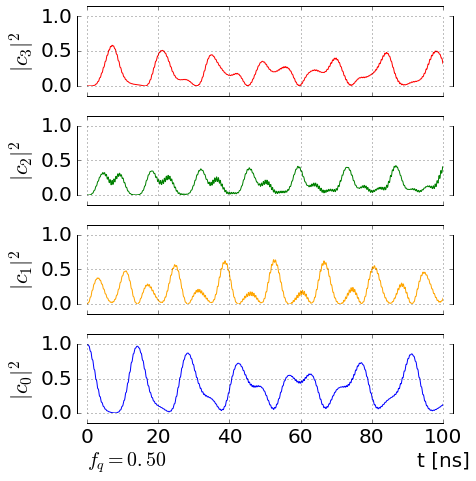

In [13]:
fig, axes = plt.subplots(nrows = 4, ncols=1, figsize=(7,7))

lines = [c0s, c1s, c2s, c3s]
colors = ["blue", "orange", "green", "red"]
for idx, cs, ax in zip(range(0, 4), lines, axes[::-1]):
    ax.plot(Ts, cs, color = colors[idx])
    dict(ax.spines.items())["left"].set_position(('outward', 10))
    dict(ax.spines.items())["bottom"].set_position(('outward', 10))
    dict(ax.spines.items())["top"].set_position(('outward', 10))
    dict(ax.spines.items())["right"].set_position(('outward', 10))
    ax.set_ylim(0, 1)
    ax.grid()
    ax.set_yticks((0,.5,1))
    ax.set_ylabel("$|c_%i|^2$"%idx, fontsize=22)
    if idx > 0:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel("t [ns]",position=(1,0))
        ax.annotate("$f_q = %.2f$"%f_q, (0,0), xytext=(0,-0.75), textcoords="axes fraction")
plt.tight_layout()
plt.savefig("tr_vstr_dr.pdf", format="pdf")